# IMPORT LIBRARIES

In [170]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from Singkatan.SingkatanConverter import SingkatanConverter
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
from transformers import BertTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

# LOAD DATASET

In [172]:
# Load the df
file_path = 'dataset.csv'
df = pd.read_csv(file_path)


In [173]:
# Display the first few rows of the df
df.head()

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ga:sourceMedium         156 non-null    object 
 1   ga:pageTitle            156 non-null    object 
 2   ga:users                155 non-null    float64
 3   ga:bounceRate           155 non-null    float64
 4   ga:pageviews            155 non-null    float64
 5   ga:pageviewsPerSession  155 non-null    float64
 6   ga:avgTimeOnPage        155 non-null    float64
dtypes: float64(5), object(2)
memory usage: 8.7+ KB


# EXPLORATORY DATA ANALYSIS

## Replace Column Name

In [175]:
df.columns = df.columns.str.replace('ga:', '')
df

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233
...,...,...,...,...,...,...,...
151,facebook / cpc,"Edan, Ponsel Ini Punya Baterai 13.000 mAh",198.0,76.923077,215.0,1.837607,101.685393
152,facebook / cpc,Gempa Keras di Jakarta Terasa Lebih dari 1 Menit,180.0,20.000000,215.0,2.388889,233.640000
153,facebook / cpc,Jennifer Dunn dan Deretan Mobil Mewahnya,180.0,100.000000,215.0,23.888889,97.836735
154,facebook / cpc,Kasus Salah Baca Xiaomi Terulang Kembali,180.0,83.333333,215.0,1.990741,178.449438


In [176]:
df

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233
...,...,...,...,...,...,...,...
151,facebook / cpc,"Edan, Ponsel Ini Punya Baterai 13.000 mAh",198.0,76.923077,215.0,1.837607,101.685393
152,facebook / cpc,Gempa Keras di Jakarta Terasa Lebih dari 1 Menit,180.0,20.000000,215.0,2.388889,233.640000
153,facebook / cpc,Jennifer Dunn dan Deretan Mobil Mewahnya,180.0,100.000000,215.0,23.888889,97.836735
154,facebook / cpc,Kasus Salah Baca Xiaomi Terulang Kembali,180.0,83.333333,215.0,1.990741,178.449438


## Check Duplicates and Unique Value

In [177]:
df['sourceMedium'].unique()
df[df.duplicated(subset=['pageTitle'])]

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
103,google / cpc,Gempa Keras Guncang Jakarta,206.0,27.777778,323.0,1.993827,85.038627
114,google / cpc,"Kabar Duka, Sys NS Meninggal Dunia",81.0,42.857143,296.0,4.698413,10.051793
133,google / cpc,Andi Narogong Ungkap Peran Novanto cs di Proye...,117.0,0.000000,251.0,0.000000,84.765957
134,google / cpc,"Gempa 6,4 SR Guncang Jakarta",189.0,100.000000,251.0,27.888889,143.200000
142,google / cpc,"Messi Berjaket Go-Jek, Isyana Kini Jadi 'Korba...",9.0,0.000000,233.0,0.000000,24.607143


In [178]:
df[df['pageTitle'] == 'Gempa Keras Guncang Jakarta']
## duplicate cause 2 sources

df[df['pageTitle'] == 'Kabar Duka, Sys NS Meninggal Dunia']
df[df['pageTitle'] == 'Gempa 6,4 SR Guncang Jakarta']


,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
14,facebook / cpc,"Gempa 6,4 SR Guncang Jakarta",3717.0,50.0,4220.0,78.148148,256.062098
134,google / cpc,"Gempa 6,4 SR Guncang Jakarta",189.0,100.0,251.0,27.888889,143.200000


## Check Nulls

In [179]:
df[df.isnull().any(axis=1)]

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
155,facebook / cpc,Netizen Ramai Teriakkan,NaN,NaN,NaN,NaN,NaN


In [180]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 154
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sourceMedium         155 non-null    object 
 1   pageTitle            155 non-null    object 
 2   users                155 non-null    float64
 3   bounceRate           155 non-null    float64
 4   pageviews            155 non-null    float64
 5   pageviewsPerSession  155 non-null    float64
 6   avgTimeOnPage        155 non-null    float64
dtypes: float64(5), object(2)
memory usage: 9.7+ KB


## Replace Source

In [181]:
df['sourceMedium'].value_counts()

sourceMedium
facebook / cpc    150
google / cpc        5
Name: count, dtype: int64

In [137]:
df['sourceMedium'] = df['sourceMedium'].replace({'facebook / cpc': 1, 'google / cpc': 0})
df

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
0,1,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,1,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,1,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,1,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,1,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233
...,...,...,...,...,...,...,...
150,1,Ungkapan Duka Cita Untuk Sys NS Deras di Insta...,153.0,0.000000,224.0,0.000000,109.847059
151,1,"Edan, Ponsel Ini Punya Baterai 13.000 mAh",198.0,76.923077,215.0,1.837607,101.685393
152,1,Gempa Keras di Jakarta Terasa Lebih dari 1 Menit,180.0,20.000000,215.0,2.388889,233.640000
153,1,Jennifer Dunn dan Deretan Mobil Mewahnya,180.0,100.000000,215.0,23.888889,97.836735


## Column Analysis

In [138]:
df.groupby('sourceMedium', as_index=False).mean(numeric_only=True).value_counts()

sourceMedium  users        bounceRate  pageviews    pageviewsPerSession  avgTimeOnPage
0             120.400000   34.126984   270.800000   6.916226             69.532704        1
1             2058.233333  31.852615   3718.386667  16.513886            75.624879        1
Name: count, dtype: int64

## Correlation Matrix

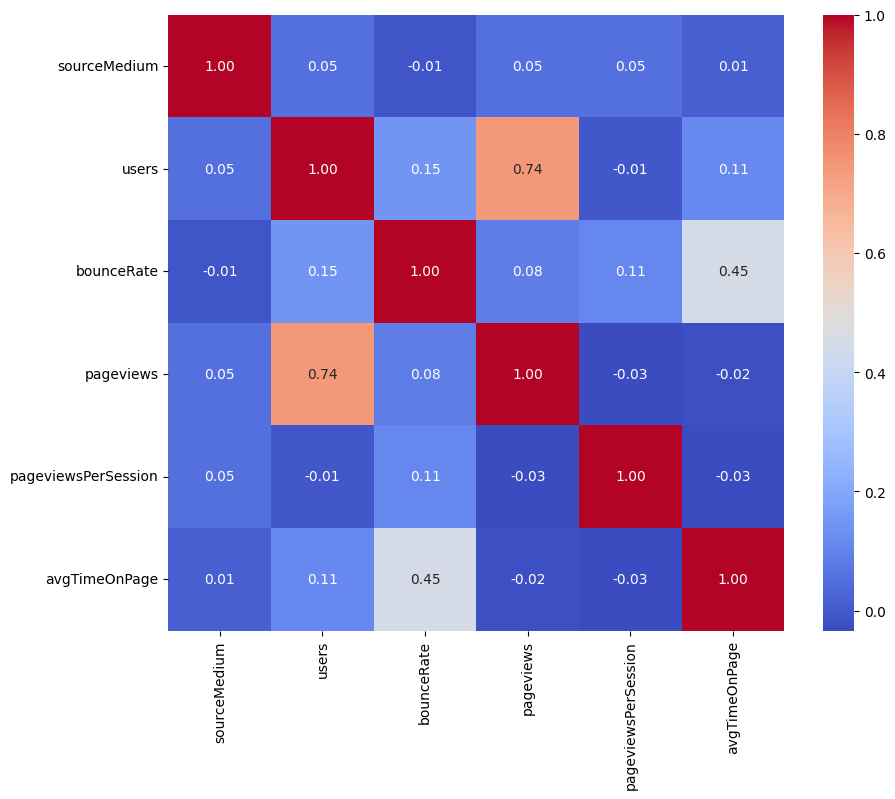

In [139]:
# Select only numerical columns
num_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numerical columns
correlation_matrix = num_columns.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Display the heatmap
plt.show()

# CLEANING

In [140]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\XYLA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\XYLA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Lower Cased

In [141]:
df['pageTitle'] = df['pageTitle'].str.lower()
df

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
0,1,"bikin lambe turah diomelin, nih si seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,1,heboh! kiki farel transfer uang jajan rp 1 jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,1,"tak sesuai harapan, barang belanja online ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,1,"antar 'tuyul', 7 pengemudi grab dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,1,melihat kantor pelayanan grab driver center,41155.0,11.630219,44072.0,43.809145,180.944233
...,...,...,...,...,...,...,...
150,1,ungkapan duka cita untuk sys ns deras di insta...,153.0,0.000000,224.0,0.000000,109.847059
151,1,"edan, ponsel ini punya baterai 13.000 mah",198.0,76.923077,215.0,1.837607,101.685393
152,1,gempa keras di jakarta terasa lebih dari 1 menit,180.0,20.000000,215.0,2.388889,233.640000
153,1,jennifer dunn dan deretan mobil mewahnya,180.0,100.000000,215.0,23.888889,97.836735


## Remove Punctuation

In [142]:
df['pageTitle'] = df['pageTitle'].str.replace(f"[{string.punctuation}]", '', regex=True)
df

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
0,1,bikin lambe turah diomelin nih si seksi yang l...,13736.0,19.269967,83593.0,6.042140,21.790189
1,1,heboh kiki farel transfer uang jajan rp 1 juta...,15909.0,62.303763,74032.0,4.612011,16.330553
2,1,tak sesuai harapan barang belanja online ini b...,7748.0,30.934520,54657.0,6.949396,21.429338
3,1,antar tuyul 7 pengemudi grab dibekuk,43893.0,6.966219,47924.0,1.106560,5.056397
4,1,melihat kantor pelayanan grab driver center,41155.0,11.630219,44072.0,43.809145,180.944233
...,...,...,...,...,...,...,...
150,1,ungkapan duka cita untuk sys ns deras di insta...,153.0,0.000000,224.0,0.000000,109.847059
151,1,edan ponsel ini punya baterai 13000 mah,198.0,76.923077,215.0,1.837607,101.685393
152,1,gempa keras di jakarta terasa lebih dari 1 menit,180.0,20.000000,215.0,2.388889,233.640000
153,1,jennifer dunn dan deretan mobil mewahnya,180.0,100.000000,215.0,23.888889,97.836735


## Remove Stop Words

In [143]:
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = set(line.strip().lower() for line in file)
    return stopwords

stop_words = load_stopwords('stopwords-id.txt')
stop_words

{'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

# LDA IMPLEMENTATION

In [144]:
# documents = df['pageTitle'].tolist()

# # Preprocess documents
# texts = [[word for word in word_tokenize(doc.lower()) if word.isalnum() and word not in stop_words] for doc in documents]

# # Create a dictionary and corpus for LDA
# dictionary = corpora.Dictionary(texts)
# corpus = [dictionary.doc2bow(text) for text in texts]

# # Train LDA model
# lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# # Display topics
# for idx, topic in lda_model.print_topics(-1):
#     print(f"Topic: {idx} \nWords: {topic}\n")

In [145]:
# def get_topic_distribution(model, corpus):
#     return [model.get_document_topics(doc, minimum_probability=0) for doc in corpus]

# topic_distributions = get_topic_distribution(lda_model, corpus)

# # Convert topic distributions to a DataFrame
# topic_df = pd.DataFrame([dict(dist) for dist in topic_distributions]).fillna(0)

# # Join topic distributions with the original DataFrame
# df_topics = df.join(topic_df, rsuffix='_topic')

In [146]:
# df_topics

# INDOBERT

In [147]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import openai
from bertopic.representation import OpenAI

In [148]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords


In [150]:
pageTitle = df["pageTitle"]

In [151]:
indonesia_stopwords = stopwords.words('indonesian')

In [152]:
embedding_model = SentenceTransformer('firqaaa/indo-sentence-bert-base')
embeddings = embedding_model.encode(pageTitle, show_progress_bar=True)
umap_model = UMAP(n_neighbors=10, n_components=10, min_dist=0.1, metric='cosine', random_state=42)

# control topic generation
hdbscan_model = HDBSCAN(min_cluster_size=3, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
vectorizer_model = CountVectorizer(stop_words=indonesia_stopwords, min_df=2, ngram_range=(1, 2))

# Define the prompt for the OpenAI model
prompt = """
Saya mempunyai suatu judul berita sebagai berikut:
[DOCUMENTS]
Judul tersebut memiliki beberapa kata kunci: [KEYWORDS]

Berdasarkan informasi di atas, berikan suatu topik yang pendek tetapi deskriptif dengan maksimal 7 kata. Pastikan mengikuti format berikut:
topic: <topic label>
"""

# Initialize the representation model
representation_model = OpenAI(client, model="gpt-4o-mini", exponential_backoff=True, chat=True, prompt=prompt)

# Initialize BERTopic with the necessary models
pageTitle_topicModel = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    top_n_words=5,
    verbose=True
)

# Fit the model on your data
topics, probs = pageTitle_topicModel.fit_transform(pageTitle)

# Print out the topics
for topic in pageTitle_topicModel.get_topic_info()["Representation"]:
    print(topic[0])

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2024-08-11 12:40:06,756 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2024-08-11 12:40:13,295 - BERTopic - Embedding - Completed ✓
2024-08-11 12:40:13,298 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-11 12:40:15,246 - BERTopic - Dimensionality - Completed ✓
2024-08-11 12:40:15,249 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-11 12:40:15,284 - BERTopic - Cluster - Completed ✓
2024-08-11 12:40:15,296 - BERTopic - Representation - Extracting topics from clusters using representation models.
100%|██████████| 18/18 [00:19<00:00,  1.09s/it]
2024-08-11 12:40:34,936 - BERTopic - Representation - Completed ✓


Kehebohan Berita Terkini di Jakarta
Pemakaman Sy Ns, Seniman Serba Bisa
Razia Driver Grab Antar Tuyul Terbongkar
Gempa Keras Guncang Jakarta dan Banten
Kehebatan Foto Dalam Dunia Sepak Bola
Permohonan Maaf dan Laporan Polisi Artis
Gaya Busana Artis dan Kontroversi Pasha Ungu
Mobil Kepolisian dan Koleksi Mewah
Klarifikasi Berita Gempa Banten Viral
Kontroversi Selebriti dan Transfer Uang
Kontroversi TNI dan Artis Felicya
Kejahatan terhadap siswi dan novel fantasi
Pembunuhan Driver Taksi oleh Pelajar Semarang
Isu Pembangunan dan Transportasi di Jakarta
Kocak dan Aneh dalam Belanja Online
Pencemaran Nama Baik Sultan Brunei
Peran dan Kasus Korupsi Politisi di E-KTP
Kedekatan Seleb dan Anak Dalam Foto


## Topics Generated

In [153]:
pageTitle_topicModel.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,18,-1_Kehebohan Berita Terkini di Jakarta,[Kehebohan Berita Terkini di Jakarta],[dipolisikan laudya cynthia bella bantah gelap...
1,0,18,"0_Pemakaman Sy Ns, Seniman Serba Bisa","[Pemakaman Sy Ns, Seniman Serba Bisa]","[sys ns seniman yang serba bisa, sahabat sebut..."
2,1,13,1_Razia Driver Grab Antar Tuyul Terbongkar,[Razia Driver Grab Antar Tuyul Terbongkar],[sebelum mengantar tuyul pengemudi grab ada ya...
3,2,13,2_Gempa Keras Guncang Jakarta dan Banten,[Gempa Keras Guncang Jakarta dan Banten],"[gempa keras guncang jakarta, gempa keras di j..."
4,3,11,3_Kehebatan Foto Dalam Dunia Sepak Bola,[Kehebatan Foto Dalam Dunia Sepak Bola],"[karya memukau jawara kontes foto warna alam, ..."
5,4,9,4_Permohonan Maaf dan Laporan Polisi Artis,[Permohonan Maaf dan Laporan Polisi Artis],[merasa tertipu gatot brajamusti reza artamevi...
6,5,8,5_Gaya Busana Artis dan Kontroversi Pasha Ungu,[Gaya Busana Artis dan Kontroversi Pasha Ungu],[begini gaya nyentrik pasha ungu yang menuai k...
7,6,8,6_Mobil Kepolisian dan Koleksi Mewah,[Mobil Kepolisian dan Koleksi Mewah],[datsun cross akan jadi mobil polisi juga sepe...
8,7,8,7_Klarifikasi Berita Gempa Banten Viral,[Klarifikasi Berita Gempa Banten Viral],[penampakan rumah di lebak yang rusak akibat g...
9,8,8,8_Kontroversi Selebriti dan Transfer Uang,[Kontroversi Selebriti dan Transfer Uang],[heboh kiki farel transfer uang jajan rp 1 jut...


In [154]:
pageTitle_topicModel.get_document_info(pageTitle)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,bikin lambe turah diomelin nih si seksi yang l...,-1,-1_Kehebohan Berita Terkini di Jakarta,[Kehebohan Berita Terkini di Jakarta],[dipolisikan laudya cynthia bella bantah gelap...,Kehebohan Berita Terkini di Jakarta,0.000000,False
1,heboh kiki farel transfer uang jajan rp 1 juta...,8,8_Kontroversi Selebriti dan Transfer Uang,[Kontroversi Selebriti dan Transfer Uang],[heboh kiki farel transfer uang jajan rp 1 jut...,Kontroversi Selebriti dan Transfer Uang,1.000000,True
2,tak sesuai harapan barang belanja online ini b...,13,13_Kocak dan Aneh dalam Belanja Online,[Kocak dan Aneh dalam Belanja Online],[20 produk aneh ini dijual di online shop biki...,Kocak dan Aneh dalam Belanja Online,1.000000,True
3,antar tuyul 7 pengemudi grab dibekuk,1,1_Razia Driver Grab Antar Tuyul Terbongkar,[Razia Driver Grab Antar Tuyul Terbongkar],[sebelum mengantar tuyul pengemudi grab ada ya...,Razia Driver Grab Antar Tuyul Terbongkar,1.000000,True
4,melihat kantor pelayanan grab driver center,1,1_Razia Driver Grab Antar Tuyul Terbongkar,[Razia Driver Grab Antar Tuyul Terbongkar],[sebelum mengantar tuyul pengemudi grab ada ya...,Razia Driver Grab Antar Tuyul Terbongkar,0.955569,False
...,...,...,...,...,...,...,...,...
150,ungkapan duka cita untuk sys ns deras di insta...,0,"0_Pemakaman Sy Ns, Seniman Serba Bisa","[Pemakaman Sy Ns, Seniman Serba Bisa]","[sys ns seniman yang serba bisa, sahabat sebut...","Pemakaman Sy Ns, Seniman Serba Bisa",0.969478,False
151,edan ponsel ini punya baterai 13000 mah,6,6_Mobil Kepolisian dan Koleksi Mewah,[Mobil Kepolisian dan Koleksi Mewah],[datsun cross akan jadi mobil polisi juga sepe...,Mobil Kepolisian dan Koleksi Mewah,0.631762,False
152,gempa keras di jakarta terasa lebih dari 1 menit,2,2_Gempa Keras Guncang Jakarta dan Banten,[Gempa Keras Guncang Jakarta dan Banten],"[gempa keras guncang jakarta, gempa keras di j...",Gempa Keras Guncang Jakarta dan Banten,0.951389,True
153,jennifer dunn dan deretan mobil mewahnya,6,6_Mobil Kepolisian dan Koleksi Mewah,[Mobil Kepolisian dan Koleksi Mewah],[datsun cross akan jadi mobil polisi juga sepe...,Mobil Kepolisian dan Koleksi Mewah,0.856773,True


In [155]:
df['Topic'] = topics
df['Probability'] = probs
df['Representation'] = df['Topic'].apply(lambda topic: pageTitle_topicModel.get_topic(topic)[0] if topic != -1 else "Outlier")
df

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage,Topic,Probability,Representation
0,1,bikin lambe turah diomelin nih si seksi yang l...,13736.0,19.269967,83593.0,6.042140,21.790189,-1,0.000000,Outlier
1,1,heboh kiki farel transfer uang jajan rp 1 juta...,15909.0,62.303763,74032.0,4.612011,16.330553,8,1.000000,"(Kontroversi Selebriti dan Transfer Uang, 1)"
2,1,tak sesuai harapan barang belanja online ini b...,7748.0,30.934520,54657.0,6.949396,21.429338,13,1.000000,"(Kocak dan Aneh dalam Belanja Online, 1)"
3,1,antar tuyul 7 pengemudi grab dibekuk,43893.0,6.966219,47924.0,1.106560,5.056397,1,1.000000,"(Razia Driver Grab Antar Tuyul Terbongkar, 1)"
4,1,melihat kantor pelayanan grab driver center,41155.0,11.630219,44072.0,43.809145,180.944233,1,0.955569,"(Razia Driver Grab Antar Tuyul Terbongkar, 1)"
...,...,...,...,...,...,...,...,...,...,...
150,1,ungkapan duka cita untuk sys ns deras di insta...,153.0,0.000000,224.0,0.000000,109.847059,0,0.969478,"(Pemakaman Sy Ns, Seniman Serba Bisa, 1)"
151,1,edan ponsel ini punya baterai 13000 mah,198.0,76.923077,215.0,1.837607,101.685393,6,0.631762,"(Mobil Kepolisian dan Koleksi Mewah, 1)"
152,1,gempa keras di jakarta terasa lebih dari 1 menit,180.0,20.000000,215.0,2.388889,233.640000,2,0.951389,"(Gempa Keras Guncang Jakarta dan Banten, 1)"
153,1,jennifer dunn dan deretan mobil mewahnya,180.0,100.000000,215.0,23.888889,97.836735,6,0.856773,"(Mobil Kepolisian dan Koleksi Mewah, 1)"


## Topics Summaries

### By bounceRate

In [156]:
grouped_df = df.groupby('Topic').agg({
    'users': 'mean',
    'bounceRate': 'mean',
    'pageviews': 'mean',
    'pageviewsPerSession': 'mean',
    'avgTimeOnPage': 'mean',
    'Probability': 'mean',
    'Representation': 'first'  # Keep the first occurrence of 'Representation'
})

grouped_df.sort_values(by='bounceRate', ascending=False).reset_index()

,Topic,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage,Probability,Representation
0,11,5124.833333,80.445285,5528.833333,14.712513,135.472987,0.913493,(Pembunuhan Driver Taksi oleh Pelajar Semarang...
1,10,3855.833333,59.135146,4241.833333,14.787271,90.857300,0.956015,"(Kejahatan terhadap siswi dan novel fantasi, 1)"
2,-1,1005.388889,58.064549,5124.722222,16.151128,76.255346,0.000000,Outlier
3,14,6244.250000,50.220307,6825.750000,7.894335,120.752420,1.000000,"(Pencemaran Nama Baik Sultan Brunei, 1)"
4,9,3388.571429,48.384752,3798.571429,28.670277,73.384437,0.846499,"(Kontroversi TNI dan Artis Felicya, 1)"
5,12,359.000000,44.619406,540.166667,6.631700,213.207506,0.936808,"(Isu Pembangunan dan Transportasi di Jakarta, 1)"
6,7,3434.250000,40.302755,3732.500000,17.343226,75.066152,0.829469,"(Klarifikasi Berita Gempa Banten Viral, 1)"
7,6,683.500000,38.605734,948.125000,17.161744,90.236151,0.812862,"(Mobil Kepolisian dan Koleksi Mewah, 1)"
8,1,6870.846154,37.034891,7459.692308,10.547533,110.466712,0.946133,"(Razia Driver Grab Antar Tuyul Terbongkar, 1)"
9,2,696.153846,34.311311,876.307692,12.831070,122.985092,0.897805,"(Gempa Keras Guncang Jakarta dan Banten, 1)"


### by users

In [157]:
grouped_df.sort_values(by='users', ascending=False).reset_index()

,Topic,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage,Probability,Representation
0,1,6870.846154,37.034891,7459.692308,10.547533,110.466712,0.946133,"(Razia Driver Grab Antar Tuyul Terbongkar, 1)"
1,14,6244.250000,50.220307,6825.750000,7.894335,120.752420,1.000000,"(Pencemaran Nama Baik Sultan Brunei, 1)"
2,11,5124.833333,80.445285,5528.833333,14.712513,135.472987,0.913493,(Pembunuhan Driver Taksi oleh Pelajar Semarang...
3,10,3855.833333,59.135146,4241.833333,14.787271,90.857300,0.956015,"(Kejahatan terhadap siswi dan novel fantasi, 1)"
4,7,3434.250000,40.302755,3732.500000,17.343226,75.066152,0.829469,"(Klarifikasi Berita Gempa Banten Viral, 1)"
5,9,3388.571429,48.384752,3798.571429,28.670277,73.384437,0.846499,"(Kontroversi TNI dan Artis Felicya, 1)"
6,8,2104.375000,10.764161,9977.625000,27.563935,14.752255,0.925845,"(Kontroversi Selebriti dan Transfer Uang, 1)"
7,5,1671.000000,20.900539,2099.500000,46.669701,41.096880,0.779859,"(Gaya Busana Artis dan Kontroversi Pasha Ungu, 1)"
8,13,1596.400000,10.186904,11360.600000,2.705435,25.245910,0.920429,"(Kocak dan Aneh dalam Belanja Online, 1)"
9,-1,1005.388889,58.064549,5124.722222,16.151128,76.255346,0.000000,Outlier


# WORD CLOUD

## Bounce Rate Analyzing

In [158]:
df

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage,Topic,Probability,Representation
0,1,bikin lambe turah diomelin nih si seksi yang l...,13736.0,19.269967,83593.0,6.042140,21.790189,-1,0.000000,Outlier
1,1,heboh kiki farel transfer uang jajan rp 1 juta...,15909.0,62.303763,74032.0,4.612011,16.330553,8,1.000000,"(Kontroversi Selebriti dan Transfer Uang, 1)"
2,1,tak sesuai harapan barang belanja online ini b...,7748.0,30.934520,54657.0,6.949396,21.429338,13,1.000000,"(Kocak dan Aneh dalam Belanja Online, 1)"
3,1,antar tuyul 7 pengemudi grab dibekuk,43893.0,6.966219,47924.0,1.106560,5.056397,1,1.000000,"(Razia Driver Grab Antar Tuyul Terbongkar, 1)"
4,1,melihat kantor pelayanan grab driver center,41155.0,11.630219,44072.0,43.809145,180.944233,1,0.955569,"(Razia Driver Grab Antar Tuyul Terbongkar, 1)"
...,...,...,...,...,...,...,...,...,...,...
150,1,ungkapan duka cita untuk sys ns deras di insta...,153.0,0.000000,224.0,0.000000,109.847059,0,0.969478,"(Pemakaman Sy Ns, Seniman Serba Bisa, 1)"
151,1,edan ponsel ini punya baterai 13000 mah,198.0,76.923077,215.0,1.837607,101.685393,6,0.631762,"(Mobil Kepolisian dan Koleksi Mewah, 1)"
152,1,gempa keras di jakarta terasa lebih dari 1 menit,180.0,20.000000,215.0,2.388889,233.640000,2,0.951389,"(Gempa Keras Guncang Jakarta dan Banten, 1)"
153,1,jennifer dunn dan deretan mobil mewahnya,180.0,100.000000,215.0,23.888889,97.836735,6,0.856773,"(Mobil Kepolisian dan Koleksi Mewah, 1)"


In [159]:
df.sort_values(by='bounceRate', ascending=True)
df['bounceRate'].describe()

count    155.000000
mean      31.925982
std       36.030184
min        0.000000
25%        0.000000
50%       17.070773
75%       62.401881
max      100.000000
Name: bounceRate, dtype: float64

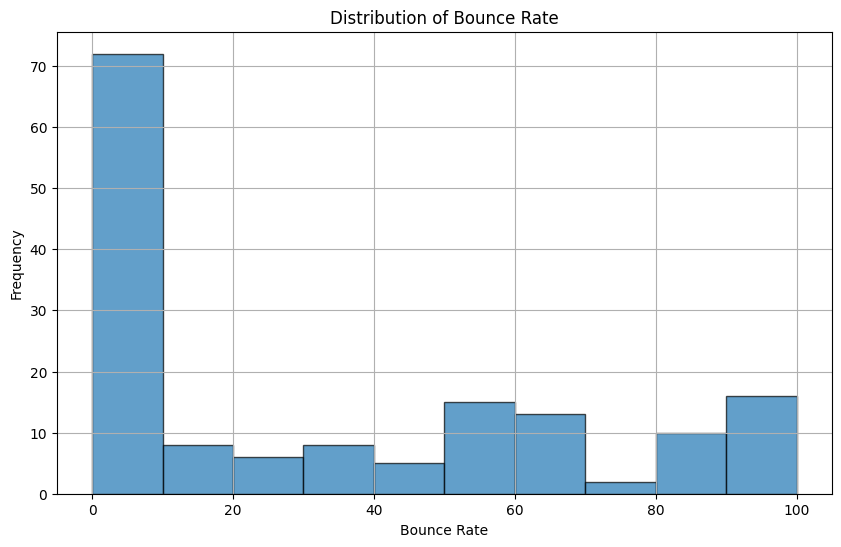

In [160]:
# Plot histogram of bounceRate
plt.figure(figsize=(10, 6))
plt.hist(df['bounceRate'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of Bounce Rate')
plt.xlabel('Bounce Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Optimized Bounce Rate

According to Hubspot.com, the average website bounce rate ranges from 26% to 70%, with an optimal value between 20% and 40%. If the bounce rate reaches 90%, there could be an issue, such as excessive bot traffic or tracking code errors.

**Bounce Rate Ranges:**
- **25% or lower:** Your website may be broken.
- **26-40%:** Good.
- **41-55%:** Average.
- **56-70%:** Higher than average, but acceptable.
- **70% or higher:** Poor performance.

*Source:* [Revou.co](https://revou.co/kosakata/bounce-rate)

In [161]:
df_optimalBounceRate = df[(df['bounceRate'] >= 20) & (df['bounceRate'] <= 40)]
df_optimalBounceRate.sort_values(by='bounceRate', ascending=True)



,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage,Topic,Probability,Representation
52,1,foto utakatik posisi main alexis sanchez di mu,117.0,20.000000,664.0,14.755556,85.142623,3,0.911511,"(Kehebatan Foto Dalam Dunia Sepak Bola, 1)"
113,1,memememe kocak cristiano ronaldo dan ponsel,90.0,20.000000,296.0,6.577778,38.396694,13,0.602147,"(Kocak dan Aneh dalam Belanja Online, 1)"
152,1,gempa keras di jakarta terasa lebih dari 1 menit,180.0,20.000000,215.0,2.388889,233.640000,2,0.951389,"(Gempa Keras Guncang Jakarta dan Banten, 1)"
60,1,foto jelang 100 hari kepemimpinan aniessandi i...,108.0,22.222222,557.0,6.876543,44.690283,12,1.000000,"(Isu Pembangunan dan Transportasi di Jakarta, 1)"
74,1,goyangan gempa terasa kuat di perkantoran,395.0,23.420074,440.0,1.635688,99.757962,2,0.747191,"(Gempa Keras Guncang Jakarta dan Banten, 1)"
103,0,gempa keras guncang jakarta,206.0,27.777778,323.0,1.993827,85.038627,2,0.897099,"(Gempa Keras Guncang Jakarta dan Banten, 1)"
2,1,tak sesuai harapan barang belanja online ini b...,7748.0,30.934520,54657.0,6.949396,21.429338,13,1.000000,"(Kocak dan Aneh dalam Belanja Online, 1)"
82,1,penjelasan bmkg soal gempa banten dimutakhirka...,332.0,31.250000,413.0,2.868056,96.466276,2,1.000000,"(Gempa Keras Guncang Jakarta dan Banten, 1)"
41,1,penyebab perut kembung seperti dialami sys ns ...,278.0,33.333333,745.0,27.592593,62.605965,0,0.993887,"(Pemakaman Sy Ns, Seniman Serba Bisa, 1)"
56,1,dinilai lecehkan tni di acara dahsyat artis fe...,512.0,33.333333,637.0,23.592593,5.535473,9,1.000000,"(Kontroversi TNI dan Artis Felicya, 1)"


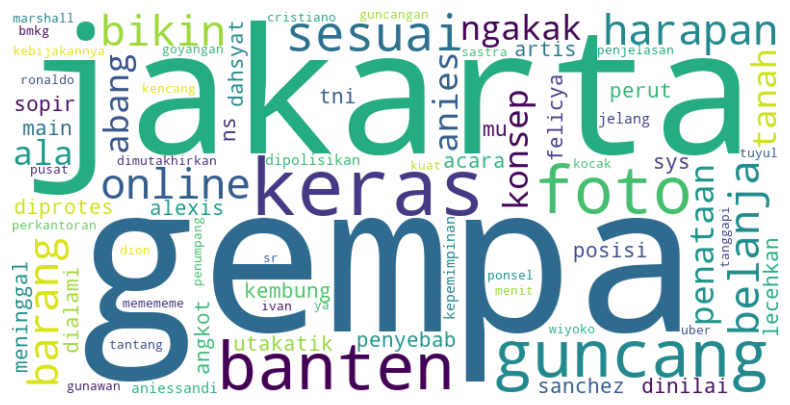

In [162]:
text = " ".join(title for title in df_optimalBounceRate['pageTitle'])

# Tokenize and remove stopwords
filtered_words = [word for word in word_tokenize(text.lower()) if word.isalnum() and word not in stop_words]

# Recombine the filtered words into a single string
filtered_text = " ".join(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes are shown
plt.show()

### Low Bounce Rate

In [163]:
df_lowBounceRate = df[df['bounceRate'] < 20]
df_lowBounceRate.sort_values(by='bounceRate', ascending=True)

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage,Topic,Probability,Representation
75,1,menteri agama keluarga dan puluhan artis antar...,189.0,0.000000,440.0,0.000000,17.346247,0,0.862240,"(Pemakaman Sy Ns, Seniman Serba Bisa, 1)"
112,1,komentar polisi amankan istri yang jual suami...,287.0,0.000000,296.0,32.888889,35.286713,10,1.000000,"(Kejahatan terhadap siswi dan novel fantasi, 1)"
107,1,gaya rambut pasha ungu yang pernah jadi tren m...,99.0,0.000000,305.0,16.944444,28.082645,5,0.701991,"(Gaya Busana Artis dan Kontroversi Pasha Ungu, 1)"
106,1,foto bukti agnez mo sudah bergaya dengan busan...,27.0,0.000000,305.0,16.944444,21.742160,16,1.000000,"(Kedekatan Seleb dan Anak Dalam Foto, 1)"
105,1,ini dia deretan bunker mewah tahan gempa,63.0,0.000000,314.0,0.000000,55.337705,6,0.649343,"(Mobil Kepolisian dan Koleksi Mewah, 1)"
...,...,...,...,...,...,...,...,...,...,...
7,1,kabar duka sys ns meninggal dunia,5180.0,12.714033,24097.0,4.742570,7.382171,0,0.989341,"(Pemakaman Sy Ns, Seniman Serba Bisa, 1)"
50,1,messi berjaket gojek isyana kini jadi korban d...,108.0,16.666667,673.0,12.462963,17.283439,8,0.939512,"(Kontroversi Selebriti dan Transfer Uang, 1)"
16,1,video truk goyang dan foto jalan retak bukan a...,3070.0,17.070773,3430.0,1.123853,14.565417,7,0.767010,"(Klarifikasi Berita Gempa Banten Viral, 1)"
47,1,beredar kabar ada gempa susulan 74 sr nanti ma...,584.0,18.556701,709.0,1.461856,51.638489,2,0.931694,"(Gempa Keras Guncang Jakarta dan Banten, 1)"


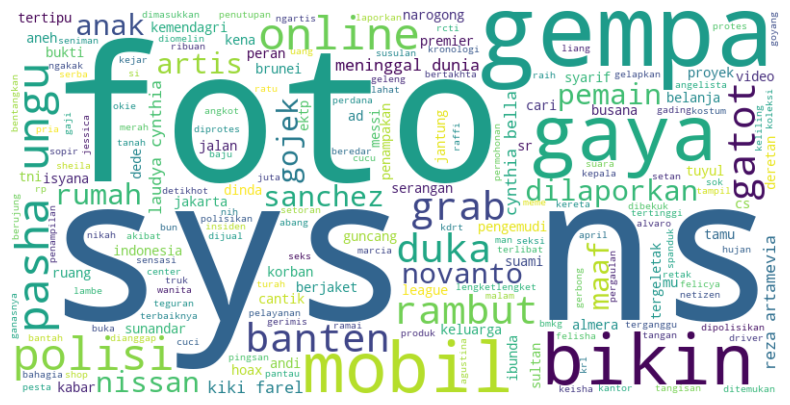

In [164]:
text = " ".join(title for title in df_lowBounceRate['pageTitle'])

# Tokenize and remove stopwords
filtered_words = [word for word in word_tokenize(text.lower()) if word.isalnum() and word not in stop_words]

# Recombine the filtered words into a single string
filtered_text = " ".join(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes are shown
plt.show()

### Normal Bounce Rate

In [165]:
df_normalBounceRate = df[(df['bounceRate'] >= 20) & (df['bounceRate'] <= 70) ]
df_normalBounceRate.sort_values(by='bounceRate', ascending=True)

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage,Topic,Probability,Representation
152,1,gempa keras di jakarta terasa lebih dari 1 menit,180.0,20.000000,215.0,2.388889,233.640000,2,0.951389,"(Gempa Keras Guncang Jakarta dan Banten, 1)"
52,1,foto utakatik posisi main alexis sanchez di mu,117.0,20.000000,664.0,14.755556,85.142623,3,0.911511,"(Kehebatan Foto Dalam Dunia Sepak Bola, 1)"
113,1,memememe kocak cristiano ronaldo dan ponsel,90.0,20.000000,296.0,6.577778,38.396694,13,0.602147,"(Kocak dan Aneh dalam Belanja Online, 1)"
60,1,foto jelang 100 hari kepemimpinan aniessandi i...,108.0,22.222222,557.0,6.876543,44.690283,12,1.000000,"(Isu Pembangunan dan Transportasi di Jakarta, 1)"
74,1,goyangan gempa terasa kuat di perkantoran,395.0,23.420074,440.0,1.635688,99.757962,2,0.747191,"(Gempa Keras Guncang Jakarta dan Banten, 1)"
103,0,gempa keras guncang jakarta,206.0,27.777778,323.0,1.993827,85.038627,2,0.897099,"(Gempa Keras Guncang Jakarta dan Banten, 1)"
2,1,tak sesuai harapan barang belanja online ini b...,7748.0,30.934520,54657.0,6.949396,21.429338,13,1.000000,"(Kocak dan Aneh dalam Belanja Online, 1)"
82,1,penjelasan bmkg soal gempa banten dimutakhirka...,332.0,31.250000,413.0,2.868056,96.466276,2,1.000000,"(Gempa Keras Guncang Jakarta dan Banten, 1)"
56,1,dinilai lecehkan tni di acara dahsyat artis fe...,512.0,33.333333,637.0,23.592593,5.535473,9,1.000000,"(Kontroversi TNI dan Artis Felicya, 1)"
144,1,dion wiyoko dan marshall sastra tantang ivan g...,27.0,33.333333,224.0,8.296296,6.609137,4,1.000000,"(Permohonan Maaf dan Laporan Polisi Artis, 1)"


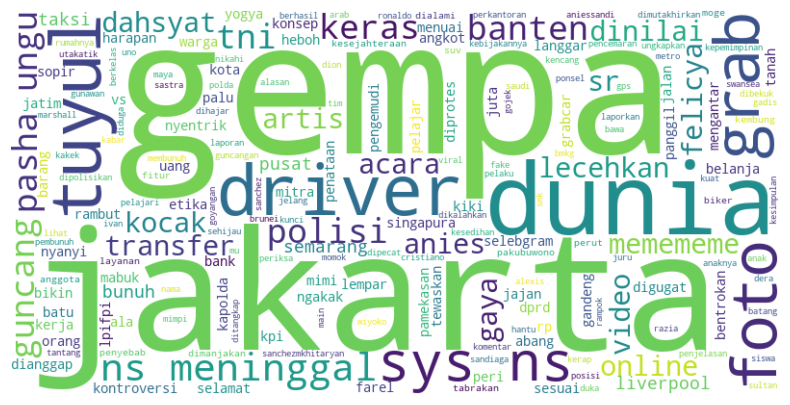

In [166]:
text = " ".join(title for title in df_normalBounceRate['pageTitle'])

# Tokenize and remove stopwords
filtered_words = [word for word in word_tokenize(text.lower()) if word.isalnum() and word not in stop_words]

# Recombine the filtered words into a single string
filtered_text = " ".join(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes are shown
plt.show()

### High Bounce Rate

In [167]:
df_highBounceRate = df[df['bounceRate'] > 70]
df_highBounceRate.sort_values(by='bounceRate', ascending=True)

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage,Topic,Probability,Representation
80,1,anies resmikan pembangunan rumah dp 0 pertama ...,341.0,74.285714,413.0,1.180000,260.444444,12,0.687637,"(Isu Pembangunan dan Transportasi di Jakarta, 1)"
151,1,edan ponsel ini punya baterai 13000 mah,198.0,76.923077,215.0,1.837607,101.685393,6,0.631762,"(Mobil Kepolisian dan Koleksi Mewah, 1)"
119,1,kaget makan di restoran bayar rp 17 juta turis...,233.0,80.000000,278.0,6.177778,81.011765,-1,0.000000,Outlier
6,1,sultan brunei laporkan kasus pencemaran nama b...,22885.0,81.563047,24941.0,1.091988,128.925825,14,1.000000,"(Pencemaran Nama Baik Sultan Brunei, 1)"
140,1,tanggapi aksi pukul klub moge harusnya bisa ko...,206.0,81.818182,233.0,2.353535,127.953271,-1,0.000000,Outlier
5,1,2 pelajar di yogya lempar batu ke mobil hingga...,28334.0,82.671710,30570.0,1.080632,123.586301,11,1.000000,(Pembunuhan Driver Taksi oleh Pelajar Semarang...
46,1,menhan ryamizard sebut as keberatan ri beli su...,637.0,83.305228,718.0,1.210793,108.938547,9,0.693731,"(Kontroversi TNI dan Artis Felicya, 1)"
90,1,mereka menolak jadi saksi meringankan untuk dr...,296.0,83.333333,377.0,3.490741,236.519418,-1,0.000000,Outlier
154,1,kasus salah baca xiaomi terulang kembali,180.0,83.333333,215.0,1.990741,178.449438,11,0.625947,(Pembunuhan Driver Taksi oleh Pelajar Semarang...
15,1,hijabers cantik ini pakai seragam sekolah naik...,3448.0,86.349021,3744.0,1.094417,103.057336,6,0.782091,"(Mobil Kepolisian dan Koleksi Mewah, 1)"


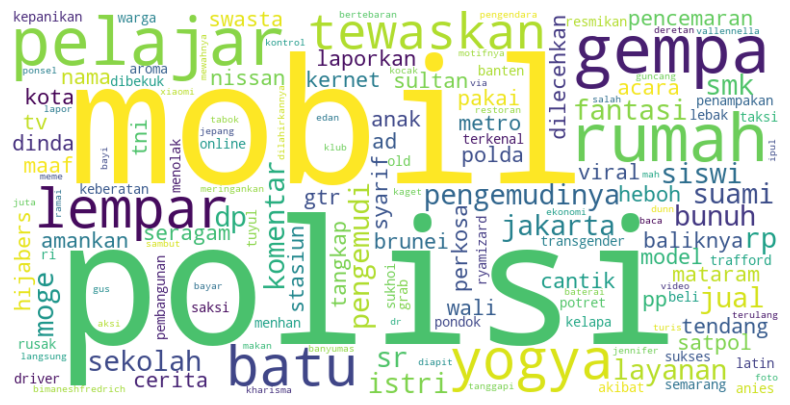

In [168]:
text = " ".join(title for title in df_highBounceRate['pageTitle'])

# Tokenize and remove stopwords
filtered_words = [word for word in word_tokenize(text.lower()) if word.isalnum() and word not in stop_words]

# Recombine the filtered words into a single string
filtered_text = " ".join(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes are shown
plt.show()